# Boxcox 変換の最適な λ を求める

In [5]:
import pandas as pd
import scipy.stats as stats
import pickle
import matplotlib.pyplot as plt

<Figure size 1000x1000 with 0 Axes>

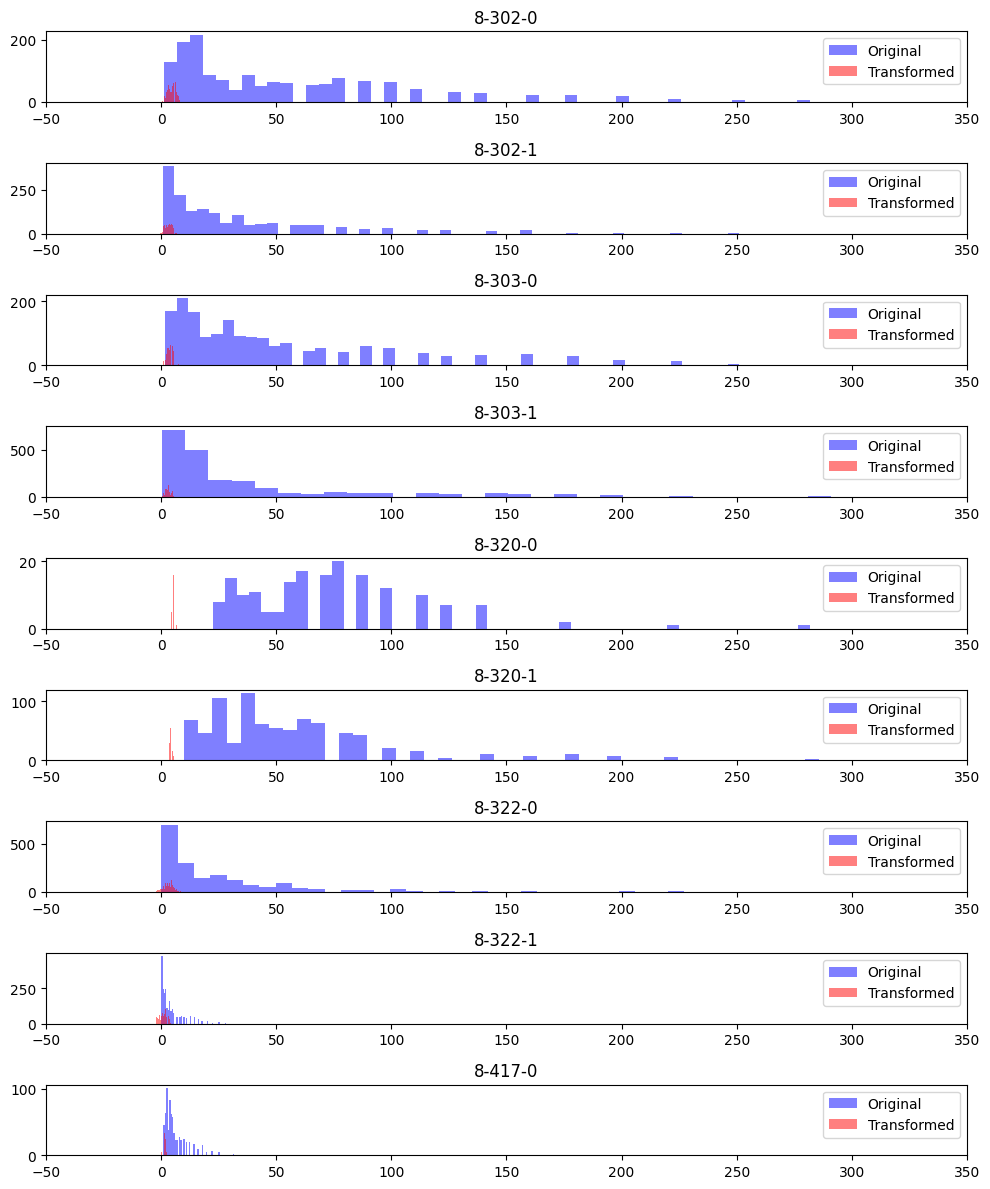

  Detector    Lambda
0  8-302-0  0.126983
1  8-302-1  0.070242
2  8-303-0  0.110447
3  8-303-1 -0.019285
4  8-320-0  0.072770
5  8-320-1  0.019706
6  8-322-0  0.150059
7  8-322-1  0.163138
8  8-417-0 -0.184788


In [21]:
DIRECTORY = "../data"
FILES = ["8-302.csv", "8-303.csv", "8-322.csv"]

detectors = []
original_proxies = []
transformed_proxies = []
lambda_values = []

df = pd.concat([pd.read_csv(f"{DIRECTORY}/{f}") for f in FILES])
for (place, detector), df in df.groupby(["place", "detector"]):
    original_proxi = df["proxi"]
    transformed_proxi, lambda_value = stats.boxcox(original_proxi)
    detectors.append(f"{place}-{detector}")
    original_proxies.append(original_proxi)
    transformed_proxies.append(transformed_proxi)
    lambda_values.append(lambda_value)

plt.figure(figsize=(10, 10))
fig, axs = plt.subplots(len(detectors), 1, figsize=(10, 12))
for i in range(len(detectors)):
    axs[i].set_xlim(-50, 350)
    axs[i].hist(original_proxies[i], bins=50, color="blue", alpha=0.5, label="Original")
    axs[i].hist(transformed_proxies[i], bins=50, color="red", alpha=0.5, label="Transformed")
    axs[i].set_title(detectors[i])
    axs[i].legend()

plt.tight_layout()
plt.show()

print(pd.DataFrame({"Detector": detectors, "Lambda": lambda_values}))